In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
import numpy as np
import torch

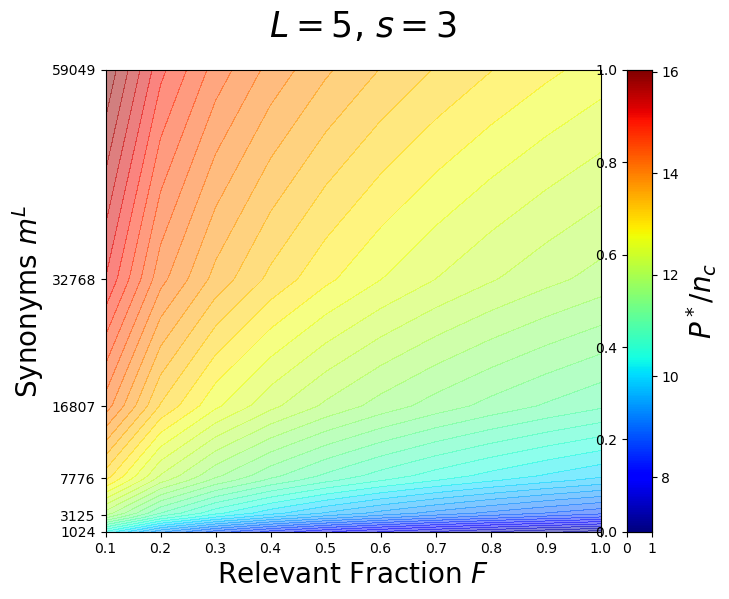

In [6]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec
from scipy.interpolate import griddata

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
L = 5
s = 3
ms = [i for i in range(4,10,1)]
msL = [i**L for i in range(4,10,1)]
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for m in ms:
    for F in Fs:
        alpha = 1
        #if (F*d>=s):
        x.append(F)
        y.append(m**L)
        ml = m**L
        #print(ml)
        s0p12 = (F)** (-2/L)
        
        c_values_cnn.append(s0p12* ml)
        #if F==.1:
        #    print(c_values_cnn)
        sl2 =  F**(-1)
        c_values_lcn.append(ml *sl2*(s**(L/2)))
        alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = max([np.max(c_values_lcn), np.max(c_values_cnn)])
min_tot = min([np.min(c_values_lcn), np.min(c_values_cnn)])

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(6, 6))
gs = GridSpec(nrows = 1,ncols=2, width_ratios=[1,0.05], wspace=0.1, left=0.07, right=0.98)
fig.suptitle(r"$L=5$, $s=3$", size = 25)
axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Synonyms $m^L$', size=20)
#axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

#scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
#axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)



# Set titles
#axs[0].set_title('LCN', size=20)
#axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = msL
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
#axs[1].set_xticks(new_x_ticks)
#axs[1].set_yticks(new_y_ticks)

# Add colorbar
mc = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
mc.set_array([])
cbar_ax = fig.add_subplot(gs[0, 1])
cbar = plt.colorbar(mc, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=20)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new_talk_lcn.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new_talk_lcn.png", bbox_inches='tight')
plt.show()


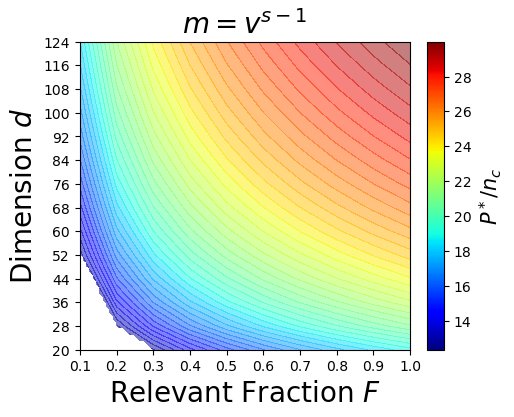

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec
from scipy.interpolate import griddata

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
s = 5
v = 10
m= v**(s-1)

ds = [i for i in range(20,128,8)]
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for d in ds:
    for F in Fs:
        alpha = 1
        if (F*d>=s):
            x.append(F)
            y.append(d)
            ml = (F * d) ** (np.log(m) / np.log(s))
            #print(ml)
            s0p12 = (F)** (-2*np.log(s) / np.log(F * d))
            
            c_values_cnn.append(s0p12* ml)
            #if F==.1:
            #    print(c_values_cnn)
            sl2 =  (F*d)**(1/2)#s ** (np.log(F * d) / (2 * np.log(s)))
            c_values_lcn.append((1 / F) * ml *sl2)
            alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
#c_values_cnn = np.log(c_values_lcn)

# Normalize color values
max_tot = max([np.max(c_values_lcn)])#, np.max(c_values_cnn)])
min_tot = min([np.min(c_values_lcn)])#, np.min(c_values_cnn)])

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig= plt.figure(figsize=(4, 4))
gs = GridSpec(nrows = 1,ncols=2, width_ratios=[1,0.05], wspace=0.1, left=0.07, right=0.98)
#fig.suptitle(r"$m=v^{s-1}$, $v=10$, $s=5$", size = 20)
axs = [fig.add_subplot(gs[0, i]) for i in range(1)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Dimension $d$', size=20)
#axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

#scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
#axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)



# Set titles
axs[0].set_title(r"$m=v^{s-1}$", size=20)
#axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ds
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
#axs[1].set_xticks(new_x_ticks)
#axs[1].set_yticks(new_y_ticks)

# Add colorbar
m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
cbar_ax = fig.add_subplot(gs[0, 1])
cbar = plt.colorbar(m, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new_maxCase_lcn.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new_maxCase_lcn.png", bbox_inches='tight')
plt.show()


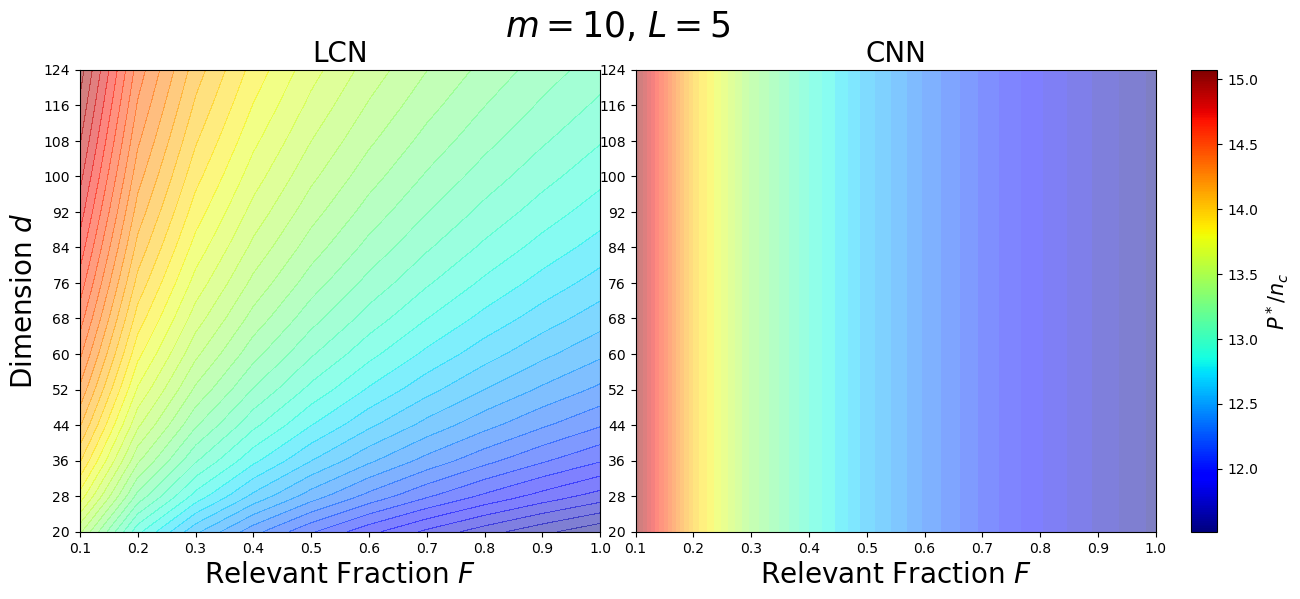

In [73]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec
from scipy.interpolate import griddata

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
L = 5
m = 10
ds = [i for i in range(20,128,8)]
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for d in ds:
    for F in Fs:
        alpha = 1
        #if (F*d>=s):
        x.append(F)
        y.append(d)
        ml = m**L
        #print(ml)
        s0p12 = (F)** (-2/L)
        
        c_values_cnn.append(s0p12* ml)
        #if F==.1:
        #    print(c_values_cnn)
        sl2 =  ((d)**(1/2))*(F**(-1/2))
        c_values_lcn.append(ml *sl2)
        alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = max([np.max(c_values_lcn), np.max(c_values_cnn)])
min_tot = min([np.min(c_values_lcn), np.min(c_values_cnn)])

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)
fig.suptitle(r"$m=10$, $L=5$", size = 25)
axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Dimension $d$', size=20)
axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

#scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)



# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ds
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)

# Add colorbar
m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(m, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new_mL.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new_mL.png", bbox_inches='tight')
plt.show()


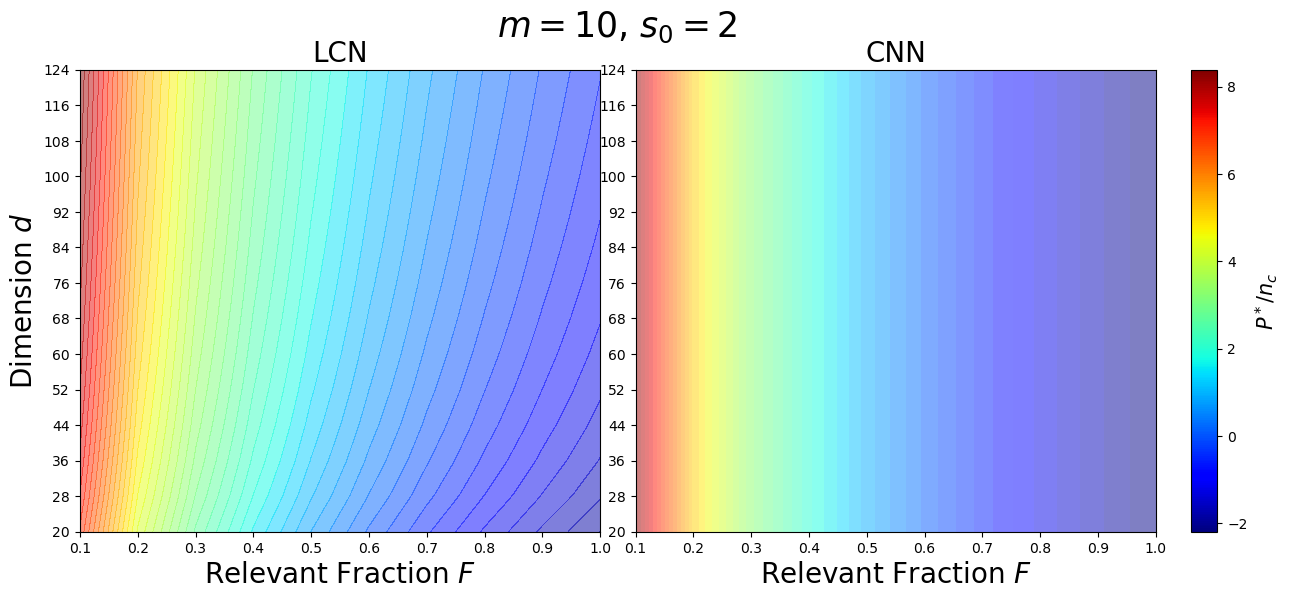

In [7]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec
from scipy.interpolate import griddata

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
#L = 5
m = 10
s0 = 2
ds = [i for i in range(20,128,8)]
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for d in ds:
    for F in Fs:
        alpha = 1
        #if (F*d>=s):
        x.append(F)
        y.append(d)
        ml = m**(-np.log(F)/np.log(s0+1))
        #print(ml)
        s0p12 = (s0+1)**(-2)
        
        c_values_cnn.append(s0p12* ml)
        #if F==.1:
        #    print(c_values_cnn)
        sl2 =  ((d)**(1/2))*(F**(-1/2))
        c_values_lcn.append(ml *sl2)
        alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = max([np.max(c_values_lcn), np.max(c_values_cnn)])
min_tot = min([np.min(c_values_lcn), np.min(c_values_cnn)])

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)
fig.suptitle(r"$m=10$, $s_0=2$", size = 25)
axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Dimension $d$', size=20)
axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

#scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)



# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ds
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)

# Add colorbar
m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(m, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new_ms0.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new_ms0.png", bbox_inches='tight')
plt.show()


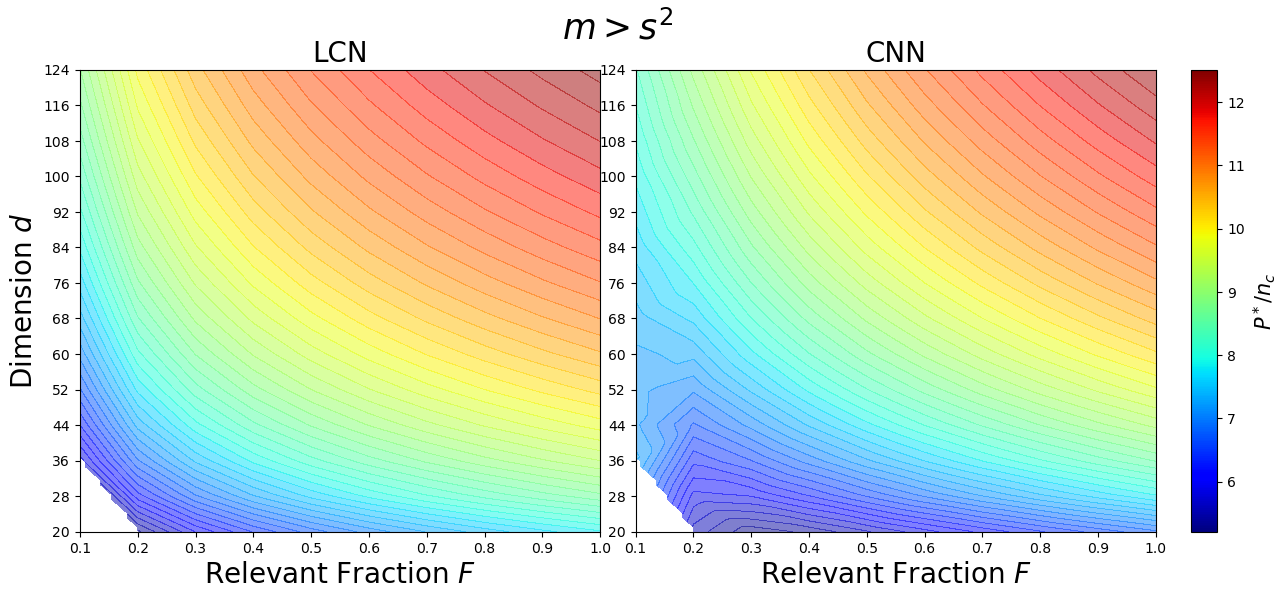

In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec
from scipy.interpolate import griddata

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
s = 3
m = 10
ds = [i for i in range(20,128,8)]
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for d in ds:
    for F in Fs:
        alpha = 1
        if (F*d>=s):
            x.append(F)
            y.append(d)
            ml = (F * d) ** (np.log(m) / np.log(s))
            #print(ml)
            s0p12 = (F)** (-2*np.log(s) / np.log(F * d))
            
            c_values_cnn.append(s0p12* ml)
            #if F==.1:
            #    print(c_values_cnn)
            sl2 =  (F*d)**(1/2)#s ** (np.log(F * d) / (2 * np.log(s)))
            c_values_lcn.append((1 / F) * ml *sl2)
            alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = max([np.max(c_values_lcn), np.max(c_values_cnn)])
min_tot = min([np.min(c_values_lcn), np.min(c_values_cnn)])

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)
fig.suptitle(r"$m>s^2$", size = 25)
axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Dimension $d$', size=20)
axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

#scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)



# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ds
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)

# Add colorbar
m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(m, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new_msBig.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new_msBig.png", bbox_inches='tight')
plt.show()


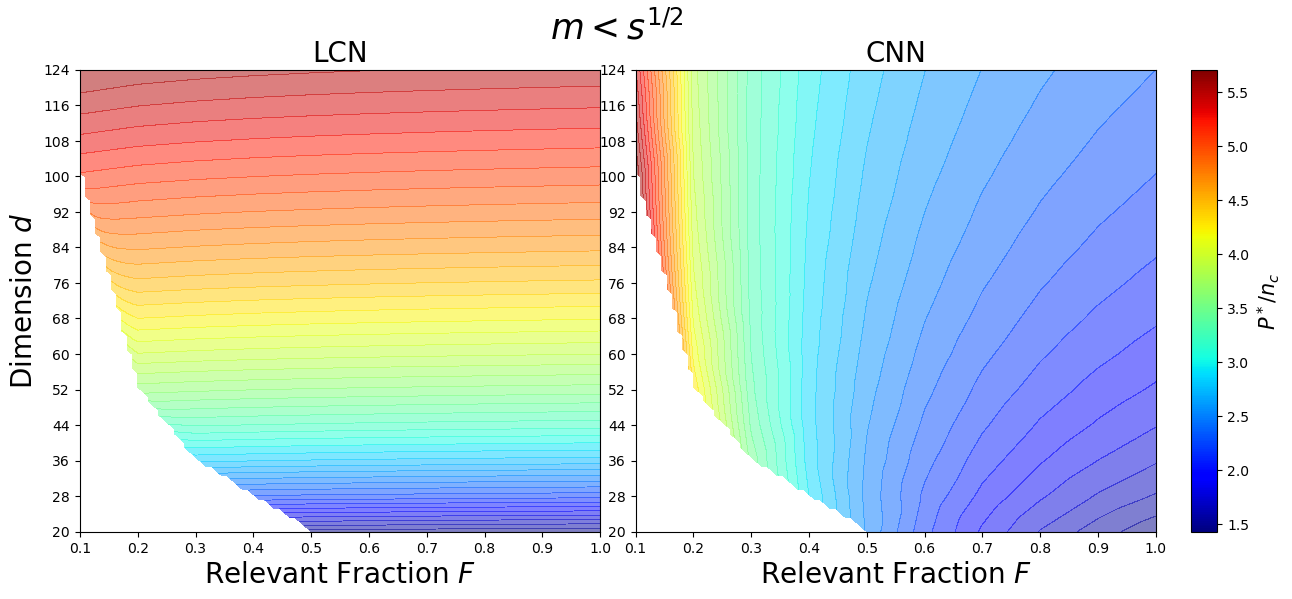

In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
s = 10
m = 3
ds = [i for i in range(20,128,8)]
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for d in ds:
    for F in Fs:
        alpha = 1
        if (F*d>=s):
            x.append(F)
            y.append(d)
            ml = (F * d) ** (np.log(m) / np.log(s))
            #print(ml)
            s0p12 = (F)** (-2*np.log(s) / np.log(F * d))
            
            c_values_cnn.append(s0p12* ml)
            #if F==.1:
            #    print(c_values_cnn)
            sl2 =  (F*d)**(1/2)#s ** (np.log(F * d) / (2 * np.log(s)))
            c_values_lcn.append((1 / F) * ml *sl2)
            alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = max([np.max(c_values_lcn), np.max(c_values_cnn)])
min_tot = min([np.min(c_values_lcn), np.min(c_values_cnn)])

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)
fig.suptitle(r"$m<s^{1/2}$", size = 25)
axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Dimension $d$', size=20)
axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

#scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)

# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ds
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)

# Add colorbar
m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(m, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new_msSmall.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new_msSmall.png", bbox_inches='tight')
plt.show()


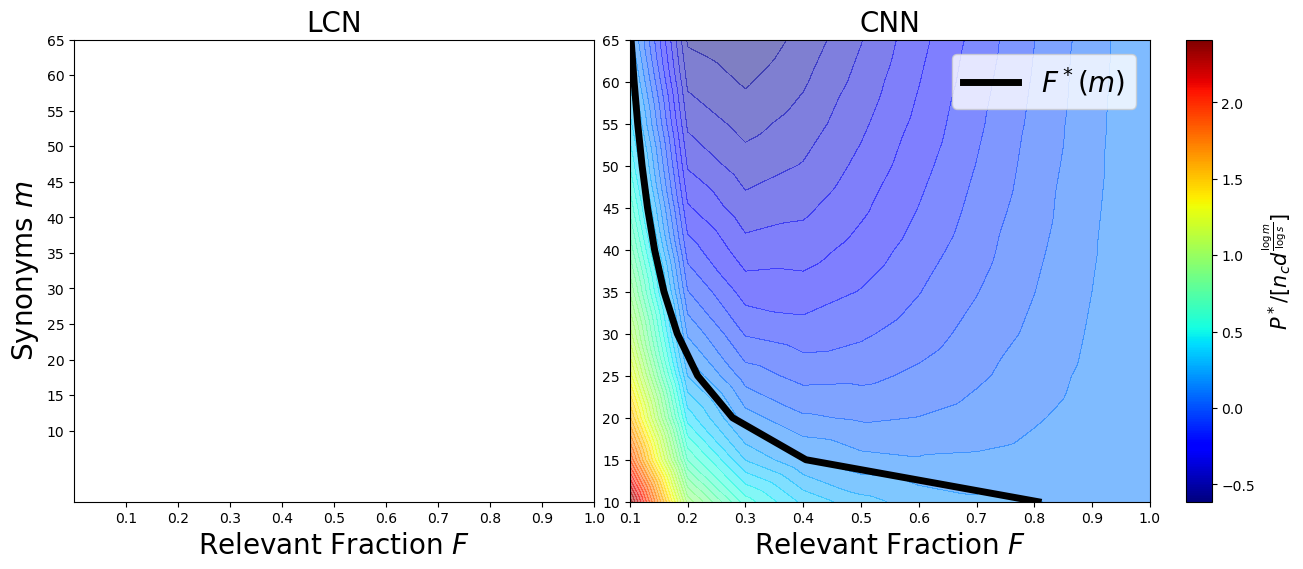

In [7]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
s = 10
ms = [i for i in range(10,67,5)]
ds = 100
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for F in Fs:
    for m in ms:
        alpha = 1
        if (F*d>=s):
            x.append(F)
            y.append(m)
            ml = (F ) ** (np.log(m) / np.log(s))
            #print(ml)
            s0p12 = (F)** (-2*np.log(s) / np.log(F * d))
            
            c_values_cnn.append(s0p12* ml)
            #if F==.1:
            #    print(c_values_cnn)
            sl2 =  (F*d)**(1/2)#s ** (np.log(F * d) / (2 * np.log(s)))
            c_values_lcn.append((1 / F) * ml *sl2)
            alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = np.max(c_values_lcn)
min_tot = np.min(c_values_lcn)

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)

axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Synonyms $m$', size=20)
axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

#scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
#zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
#axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)


axs[1].plot(s**(2*np.log(s)/np.log(ms))/d,ms, color ='black',linewidth = 5, label =r'$F^*(m)$')

#axs[0].axhline(y=s**(1/2), color='r', linestyle='--', label=r'$s^{1/2}$')

#axs[1].axvline(x=s**(2*np.log(s)/np.log(m))/d, color='r', linestyle='--', label=r'$F^*$',linewidth = 20)

# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ms
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)
axs[1].legend(loc ='upper right',fontsize = 20)
# Add colorbar
mc = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
mc.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(mc, cax=cbar_ax)
cbar.set_label(r'$P^*/[n_c d^{\frac{\log m}{\log s}}]$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new_ms_cnn.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new_ms_cnn.png", bbox_inches='tight')
#plt.show()


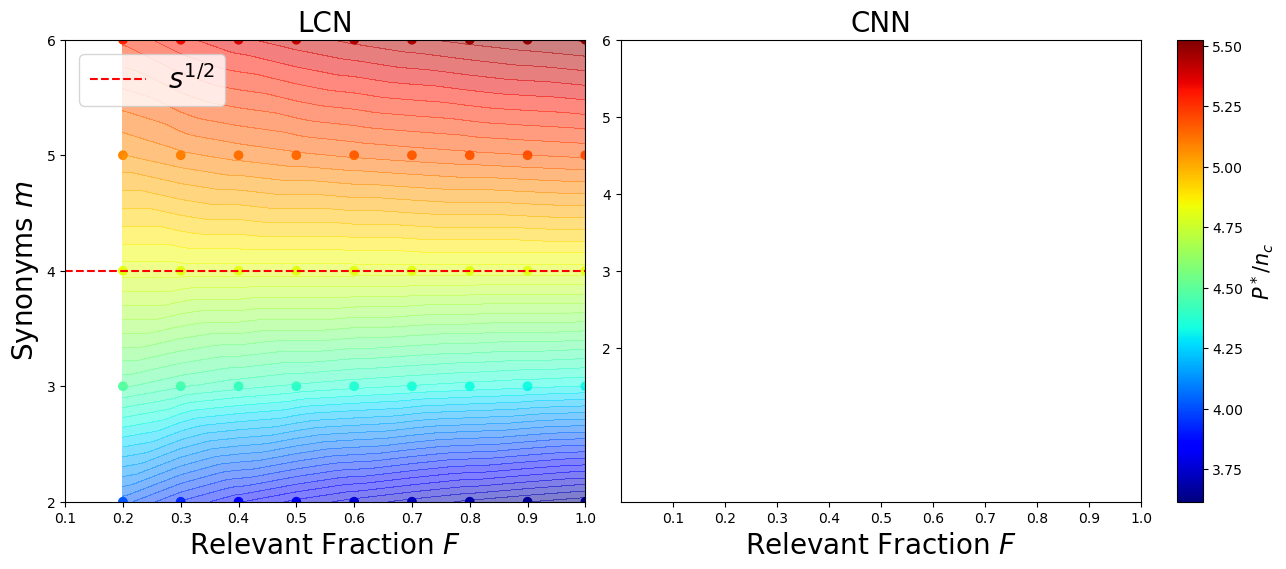

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
s = 16
ms = [i for i in range(2,7,1)]
ds = 200
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for F in Fs:
    for m in ms:
        alpha = 1
        if (F*d>=s):
            x.append(F)
            y.append(m)
            ml = (F * d) ** (np.log(m) / np.log(s))
            #print(ml)
            s0p12 = (F)** (-2*np.log(s) / np.log(F * d))
            
            c_values_cnn.append(s0p12* ml)
            #if F==.1:
            #    print(c_values_cnn)
            sl2 =  (F*d)**(1/2)#s ** (np.log(F * d) / (2 * np.log(s)))
            c_values_lcn.append((1 / F) * ml *sl2)
            alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = np.max(c_values_lcn)
min_tot = np.min(c_values_lcn)

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)

axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Synonyms $m$', size=20)
axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
#zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
#axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)


axs[0].axhline(y=s**(1/2), color='r', linestyle='--', label=r'$s^{1/2}$')
#axs[1].axhline(y=s**(2), color='r', linestyle='--', label=r'$s^{2}$')

# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ms
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)
axs[0].legend(loc ='upper left',fontsize = 20)
# Add colorbar
mc = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
mc.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(mc, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_ms_lcn.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_ms_lcn.png", bbox_inches='tight')
#plt.show()


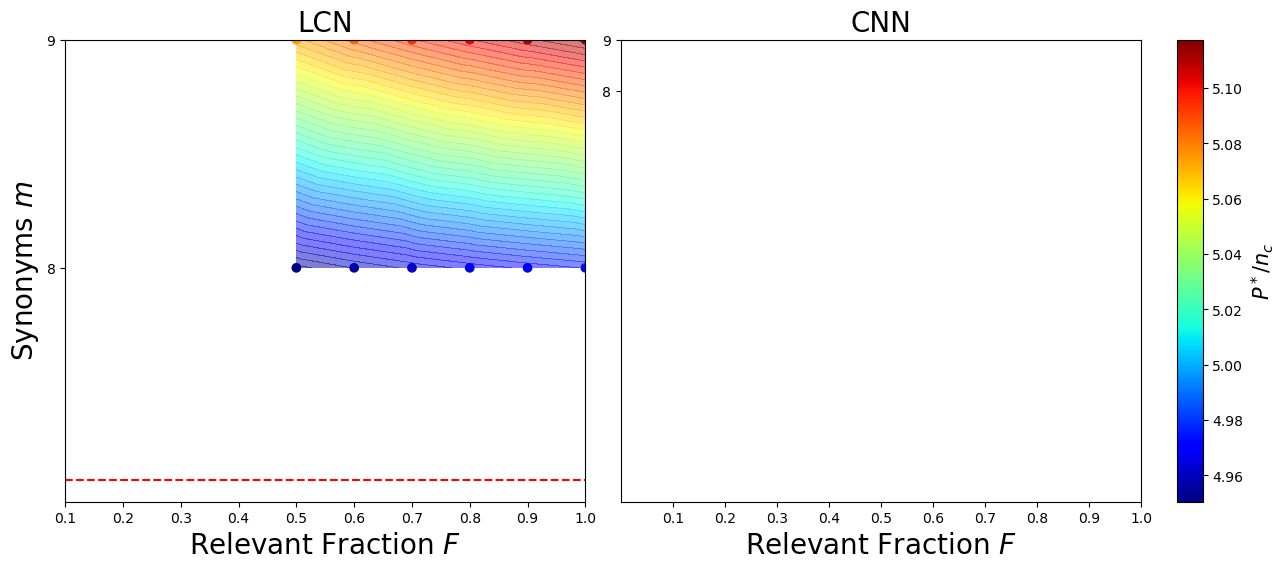

In [17]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
s = 50
ms = [i for i in range(8,10,1)]
ds = 200
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for F in Fs:
    for m in ms:
        alpha = 1
        if (F*d>=s):
            x.append(F)
            y.append(m)
            ml = (F * d) ** (np.log(m) / np.log(s))
            #print(ml)
            s0p12 = (F)** (-2*np.log(s) / np.log(F * d))
            
            c_values_cnn.append(s0p12* ml)
            #if F==.1:
            #    print(c_values_cnn)
            sl2 =  (F*d)**(1/2)#s ** (np.log(F * d) / (2 * np.log(s)))
            c_values_lcn.append((1 / F) * ml *sl2)
            alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = np.max(c_values_lcn)
min_tot = np.min(c_values_lcn)

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)

axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Synonyms $m$', size=20)
axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
#scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))


xi, yi = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

# Interpolate color values
zi_lcn = griddata((x, y), c_values_lcn, (xi, yi), method='linear')
#zi_cnn = griddata((x, y), c_values_cnn, (xi, yi), method='linear')

# Fill the area between points
axs[0].contourf(xi, yi, zi_lcn, levels=50, cmap=plt.cm.jet, alpha=0.5)
#axs[1].contourf(xi, yi, zi_cnn, levels=50, cmap=plt.cm.jet, alpha=0.5)


axs[0].axhline(y=s**(1/2), color='r', linestyle='--', label=r'$s^{1/2}$')
#axs[1].axhline(y=s**(2), color='r', linestyle='--', label=r'$s^{2}$')

# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ms
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)

# Add colorbar
mc = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
mc.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(mc, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
#plt.savefig("figures/2Dplot_pstar_new.pdf", bbox_inches='tight')
#plt.savefig("figures/2Dplot_pstar_new.png", bbox_inches='tight')
#plt.show()


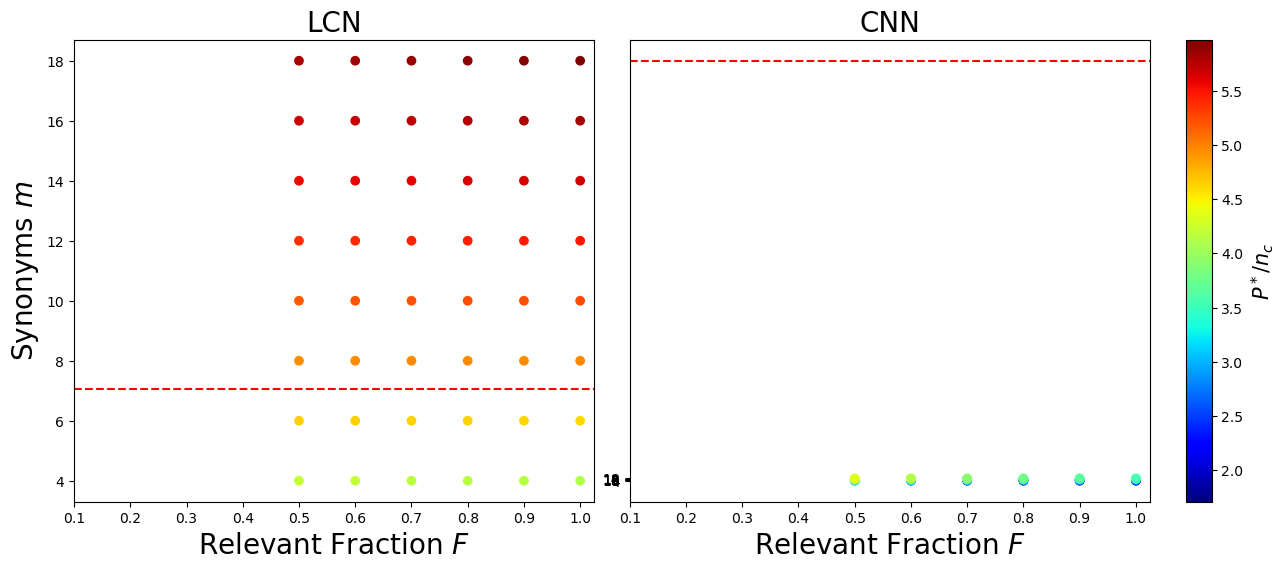

In [22]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
s = 50
ms = [i for i in range(4,20,2)]
ds = 200
Fs = [i for i in np.linspace(0.1,1,10)]

x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for F in Fs:
    for m in ms:
        alpha = 1
        if (F*d>=s):
            x.append(F)
            y.append(m)
            ml = (F * d) ** (np.log(m) / np.log(s))
            #print(ml)
            s0p12 = (F)** (-2*np.log(s) / np.log(F * d))
            
            c_values_cnn.append(s0p12* ml)
            #if F==.1:
            #    print(c_values_cnn)
            sl2 =  (F*d)**(1/2)#s ** (np.log(F * d) / (2 * np.log(s)))
            c_values_lcn.append((1 / F) * ml *sl2)
            alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = max([np.max(c_values_lcn), np.max(c_values_cnn)])
min_tot = min([np.min(c_values_lcn), np.min(c_values_cnn)])

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)

axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Relevant Fraction $F$', size=20)
axs[0].set_ylabel(r'Synonyms $m$', size=20)
axs[1].set_xlabel(r'Relevant Fraction $F$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))

axs[0].axhline(y=s**(1/2), color='r', linestyle='--', label=r'$s^{1/2}$')
axs[1].axhline(y=s**(2), color='r', linestyle='--', label=r'$s^{2}$')

# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = Fs
new_y_ticks = ms
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)

# Add colorbar
mc = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
mc.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(mc, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new.png", bbox_inches='tight')
plt.show()


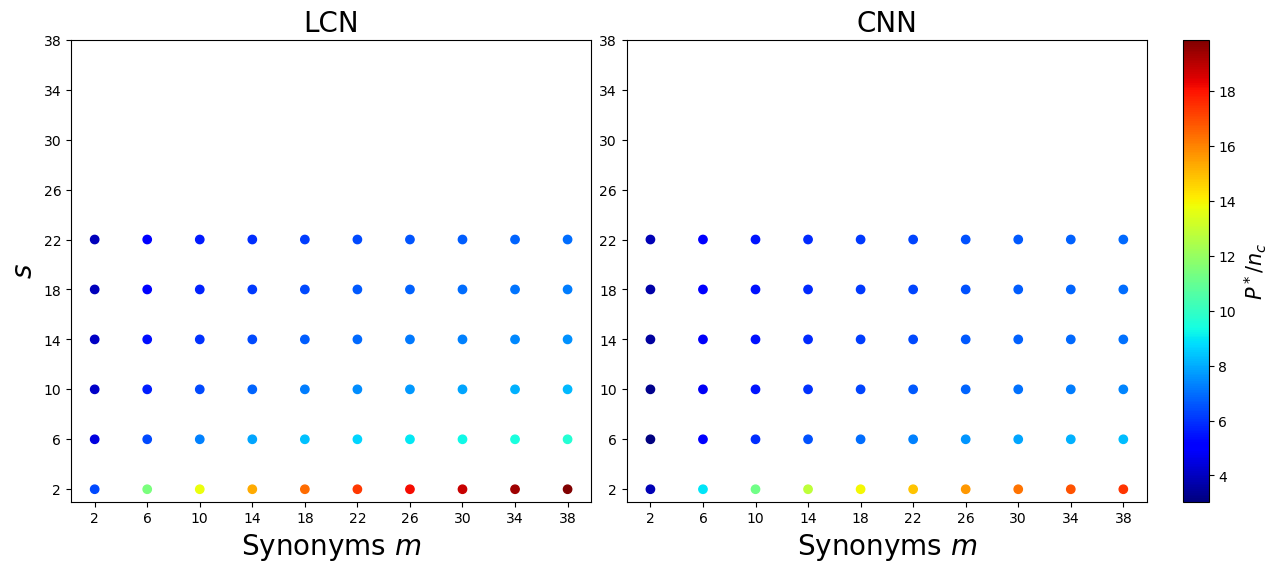

In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
s = 3
m = 3

d= 120
F = 0.2
ms = [i for i in range(2,40,4)]
ss = [i for i in range(2,40,4)]


x = []
y = []
c_values_lcn = []
c_values_cnn = []
alphas = []

# Generate data
for m in ms:
    for s in ss:
        alpha = 1
        if (F*d>=s):
            x.append(m)
            y.append(s)
            ml = (F * d) ** (np.log(m) / np.log(s))
            #print(ml)
            s0p12 = (F)** (-2*np.log(s) / np.log(F * d))
            
            c_values_cnn.append(s0p12* ml)
            #if F==.1:
            #    print(c_values_cnn)
            sl2 =  (F*d)**(1/2)#s ** (np.log(F * d) / (2 * np.log(s)))
            c_values_lcn.append((1 / F) * ml *sl2)
            alphas.append(alpha)

x = np.array(x)
y = np.array(y)
c_values_lcn = np.array(c_values_lcn)
c_values_cnn = np.array(c_values_cnn)
alphas = np.array(alphas)

# Apply log transformation to c_values
c_values_lcn = np.log(c_values_lcn)
c_values_cnn = np.log(c_values_cnn)

# Normalize color values
max_tot = max([np.max(c_values_lcn), np.max(c_values_cnn)])
min_tot = min([np.min(c_values_lcn), np.min(c_values_cnn)])

norm = colors.Normalize(vmin=min_tot, vmax=max_tot)

# Create a scatter plot
fig = plt.figure(figsize=(12.5, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)

axs = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Set axis labels
axs[0].set_xlabel(r'Synonyms $m$', size=20)
axs[0].set_ylabel(r'$s$', size=20)
axs[1].set_xlabel(r'Synonyms $m$', size=20)
#axs[1].set_ylabel(r'Dimension $d$', size=15)

# Scatter plot with color scaling

scatter1 = axs[0].scatter(x, y, c=plt.cm.jet(norm(c_values_lcn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))
scatter2 = axs[1].scatter(x, y, c=plt.cm.jet(norm(c_values_cnn)), marker='o')#, alpha=np.where(y == fixed_y_value, 1, 0.6))

# Set titles
axs[0].set_title('LCN', size=20)
axs[1].set_title('CNN', size=20)

# Ensure z-label is visible
new_x_ticks = ms
new_y_ticks = ss
axs[0].set_xticks(new_x_ticks)
axs[0].set_yticks(new_y_ticks)
axs[1].set_xticks(new_x_ticks)
axs[1].set_yticks(new_y_ticks)

# Add colorbar
m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(m, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$', size=15)

# Save and show the plot
plt.savefig("figures/2Dplot_pstar_new_ms.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_new_ms.png", bbox_inches='tight')
plt.show()


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2 2 2 2 2 5 5 5 5 5 2 2 2 2 2 5 5 5 5 5 2 2 2 2 2 5 5 5 5 5 2 2 2 2 2 5 5
 5 5 5 2 2 2 2 2 5 5 5 5 5 2 2 2 2 2 5 5 5 5 5]


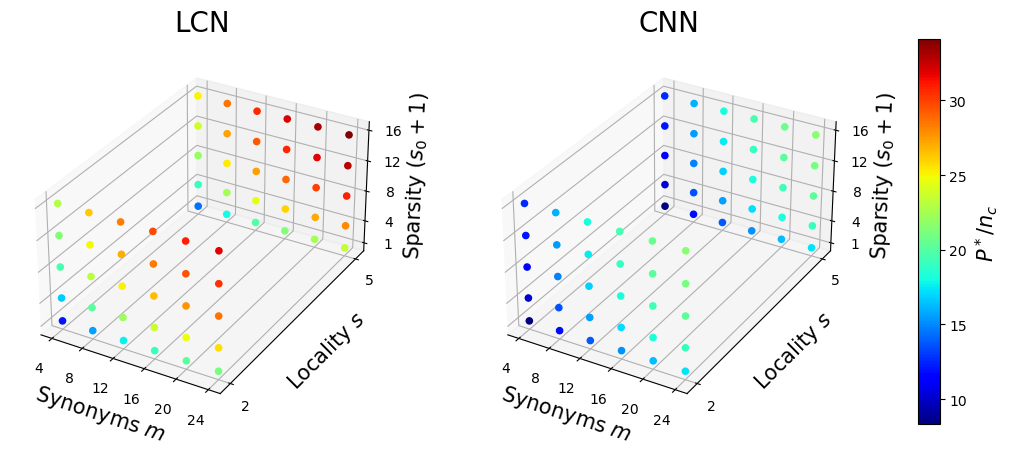

In [37]:
# Create sample data
from matplotlib.gridspec import GridSpec
np.random.seed(0)

num_s = 3
num_s0 = 6
num_m = 6

L = 5


ss = [2,5]
s0s = [1,4,8,12,16]#[1,2,3,5,7,9]
ms = [4,8,12,16,20,24]#[3,4,6,8,10,12]
x =[]
y = []
z = []
c_values_lcn = []
c_values_cnn = []
alphas = []



for (idxm,m) in enumerate(ms):
    for (idxs,s) in enumerate(ss):
        alpha = 1#/(idxs+1)
        
        for (idxs0,s0) in enumerate(s0s):
            x += [m]
            y += [s] #s
            z += [s0]#s0+1
            c_values_lcn += [(s**(L/2))*((s0+1)**L)*(m**(L))] # Values for color scaling
            c_values_cnn += [((s0+1)**2)*(m**(L))] # Values for color scaling
            alphas +=[alpha]
x = np.array(x)
y= np.array(y)
z=np.array(z)
print(alphas)
print(y)




c_values_lcn = np.array(c_values_lcn)#/max_tot
c_values_cnn = np.array(c_values_cnn)#/max_tot




alphas = np.array(alphas)
#print(c_values[c_values<=0])
c_values_lcn = np.log(c_values_lcn)
c_values_cnn= np.log(c_values_cnn)
#c_values = c_values/max(c_values)
# Create a scatter plot


max_tot = max([max(c_values_lcn),max(c_values_cnn)])
min_tot = min([min(c_values_lcn),min(c_values_cnn)])

norm = col.Normalize(vmin=min_tot, vmax=max_tot)


fig = plt.figure(figsize=(10.5, 5))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.1, left=0.07, right=0.98)

axs = [fig.add_subplot(gs[0, i], projection='3d') for i in range(2)]

# Scatter plot with color scaling
fixed_y_value = 5
scatter1 = axs[0].scatter(x, y, z, c=plt.cm.jet(norm(c_values_lcn)), marker='o',alpha=np.where(y == fixed_y_value, 1, 1))

# Set axis labels
axs[0].set_xlabel(r'Synonyms $m$',size = 15)
axs[0].set_ylabel(r'Locality $s$',size = 15)
axs[0].set_zlabel(r'Sparsity $(s_0+1$)',size = 15)
axs[0].set_title('LCN',size = 20)

# Ensure z-label is visible
axs[0].zaxis.labelpad=3
new_x_ticks = ms
axs[0].set_xticks(new_x_ticks)
new_y_ticks = ss
axs[0].set_yticks(new_y_ticks)
new_z_ticks = s0s
axs[0].set_zticks(new_z_ticks)


#------------------------------2
scatter2 = axs[1].scatter(x, y, z, c=plt.cm.jet(norm(c_values_cnn)), marker='o',alpha=np.where(y == fixed_y_value, 1, 1))

# Set axis labels
axs[1].set_xlabel(r'Synonyms $m$',size = 15)
axs[1].set_ylabel(r'Locality $s$',size = 15)
axs[1].set_zlabel(r'Sparsity $(s_0+1$)',size = 15)
axs[1].set_title(r'CNN',size = 20)

# Ensure z-label is visible
axs[1].zaxis.labelpad=3
new_x_ticks = ms
axs[1].set_xticks(new_x_ticks)
new_y_ticks = ss
axs[1].set_yticks(new_y_ticks)
new_z_ticks = s0s
axs[1].set_zticks(new_z_ticks)
#------------------------------------cbar
#cbar = fig.colorbar(scatter1, ax=axs, pad=0.1)
#cbar.set_label(r'$P^*/n_c$',size = 15)
#cbar = fig.colorbar(scatter2, ax=axs, pad=0.1)
#cbar.set_label(r'$P^*/n_c$',size = 15)

m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
#cbar = fig.colorbar(m, pad=0.15)
#cbar.set_label(r'$P^*/n_c$',size = 15)
# Show the plot
# Add colorbar
cbar_ax = fig.add_subplot(gs[0, 2])
cbar = plt.colorbar(m, cax=cbar_ax)
cbar.set_label(r'$P^*/n_c$',size = 15)

for ax in axs:
    ax.set_box_aspect([np.ptp(arr) for arr in [x, 10*y, z]])
for ax in axs:
    ax.title.set_position([0.5, -0.5])
    
plt.savefig("figures/3Dplot_pstar.pdf", bbox_inches='tight')
plt.savefig("figures/3Dplot_pstar.png", bbox_inches='tight')
plt.show()


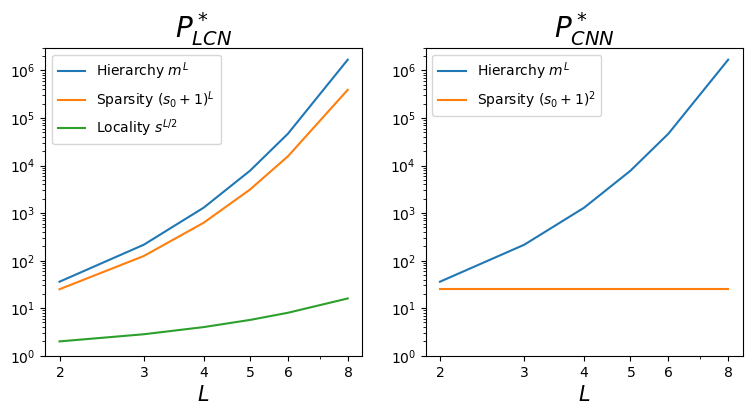

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

fig, axs = plt.subplots(1,2, figsize = (9,4))

s_fixed = 2
m_fixed = 6
s0_fixed = 4

Ls = np.array([2,3,4,5,6,8])

axs[0].plot(Ls, m_fixed**Ls,color = 'C0', ls = '-', label = r'Hierarchy $m^L$')
axs[0].plot(Ls, (s0_fixed+1)**Ls,color = 'C1', ls = '-', label = r'Sparsity $(s_0+1)^L$')
axs[0].plot(Ls, s_fixed**(Ls/2),color = 'C2', ls = '-', label = r'Locality $s^{L/2}$')
axs[0].set_xlabel(r"$L$",size = 15)
axs[0].set_title(r"$P^*_{LCN}$",size = 20)
axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[0].legend()  

axs[0].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
new_x_ticks = Ls
axs[0].set_xticks(new_x_ticks)
#--------------------------------------------
axs[1].plot(Ls, m_fixed**Ls,color = 'C0', ls = '-', label = r'Hierarchy $m^L$')
axs[1].plot(Ls, [(s0_fixed+1)**2]*len(Ls),color = 'C1', ls = '-', label = r'Sparsity $(s_0+1)^2$')
#axs[1].plot(Ls, s_fixed**(Ls/2),color = 'C2', ls = '-', label = r'$s^{L/2}$ ')
axs[1].set_xlabel(r"$L$",size = 15)
axs[1].set_title(r"$P^*_{CNN}$",size = 20)
axs[1].set_yscale("log")
axs[1].set_xscale("log")
axs[1].legend()  

axs[1].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
new_x_ticks = Ls
axs[1].set_xticks(new_x_ticks)

ymin = 10**0
ymax = 3*10**6
axs[0].set_ylim([ymin, ymax])
axs[1].set_ylim([ymin, ymax])

plt.savefig("figures/2Dplot_pstar_L.pdf", bbox_inches='tight')
plt.savefig("figures/2Dplot_pstar_L.png", bbox_inches='tight')
plt.show()

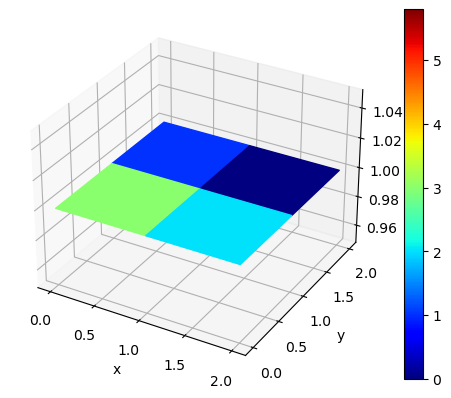

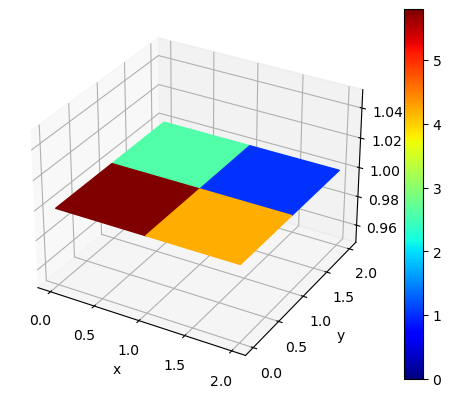

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors

x = np.arange(3)
X, Y = np.meshgrid(x, x)
Z = np.ones_like(X)

V1 = np.array([[3, 2, 2], [1, 0, 3], [2, 1, 0]])
V2 = 1 + V1 * 1.6

def plot_array(V, vmin, vmax):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(norm(V)), shade=False)

    m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
    m.set_array([])
    plt.colorbar(m)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

# Calculate the global minimum and maximum values for normalization
global_min = np.min([V1.min(), V2.min()])
global_max = np.max([V1.max(), V2.max()])

# Plot the arrays using the same color normalization
plot_array(V1, global_min, global_max)
plot_array(V2, global_min, global_max)

plt.show()
